# Assignment 4: Troll Tweet prediction

In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes  import MultinomialNB
from sklearn.model_selection import KFold
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import statistics
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

## Prototyping different Models with Sample Data 

In [2]:
df = pd.read_csv('IRAhandle_tweets_sample_data.csv',encoding="latin-1")

In [3]:
df['troll'].value_counts()


0    6631
1    5383
Name: troll, dtype: int64

In [4]:
df['account_category'].value_counts()


RightTroll      3630
NonEnglish      2429
LeftTroll       1753
NewsFeed        1573
HashtagGamer    1310
Commercial      1254
Fearmonger        46
Unknown           19
Name: account_category, dtype: int64

In [5]:
vectorizer = TfidfVectorizer()

In [6]:
df.drop(columns = ['account_category'], inplace = True)

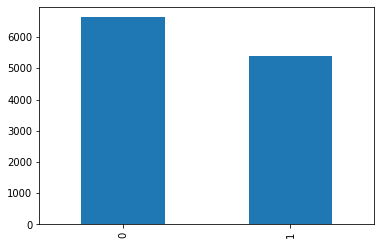

In [7]:
df['troll'].value_counts().plot(kind='bar')

## The number of Non-Trolls is higher than the Trolls, this makes the dataset unbalanced and shall introduce bias while fitting the model.

## Using Accuracy might prove to be unfruitful, we shall also check other metrics such as Precision and Cohen's Kappa Score to better evaluate our models

## Using the Porter Stemmer to reduce words to their stems

In [8]:
stemmer = PorterStemmer()

In [9]:
X = df['content']
y = df['troll']

## Loading English Stop Words from the NLTK Corpus

In [10]:
stop_words = set(nltk.corpus.stopwords.words('english'))

## Created a Tokenize Function to tokenize the text corpus, stem the text data using Porter Stemmer and Removed the stop words from the given text

In [11]:
def tokenize(text):
   tokens = [word for word in nltk.word_tokenize(text)] 
   tokens = map(str.lower, tokens)
   stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
   return stems

## Initializing TFIDF Vectorizer to extract text features

In [12]:
vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words=None, max_df=0.75, max_features=1000, lowercase=False, ngram_range=(1,2))

In [13]:
kf = KFold(n_splits=4,shuffle=True)

# Trial 1 : Training the Multinomial NB Classifier

In [14]:
mnb = MultinomialNB()

In [15]:
acc_mnb=[]
kp_mnb = []
prc_mnb= []
rcs_mnb = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test =  y.iloc[train_index], y.iloc[test_index]
    train_vectors = vectorizer_tf.fit_transform(X_train)
    test_vectors = vectorizer_tf.transform(X_test)
    train_df=pd.DataFrame(train_vectors.toarray(), columns=vectorizer_tf.get_feature_names())
    test_df=pd.DataFrame(test_vectors.toarray(), columns=vectorizer_tf.get_feature_names())
    model = mnb.fit(train_df,y_train)
    predictions = model.predict(test_df)
    print('Accuracy',accuracy_score(y_test, predictions))
    acc_mnb.append(accuracy_score(y_test, predictions))
    print('Kappa Score:',cohen_kappa_score(y_test, predictions))
    kp_mnb.append(cohen_kappa_score(y_test, predictions))
    print('Precision', precision_score(y_test, predictions))
    prc_mnb.append(precision_score(y_test, predictions))
    print('Recall Score:', recall_score(y_test, predictions))
    rcs_mnb.append(recall_score(y_test, predictions))
    print('---------------------------------------- ')

Accuracy 0.7936085219707057
Kappa Score: 0.5929226131567076
Precision 0.7109004739336493
Recall Score: 0.9009009009009009
---------------------------------------- 
Accuracy 0.8052596537949401
Kappa Score: 0.61427092652767
Precision 0.7372732592159157
Recall Score: 0.9025787965616046
---------------------------------------- 
Accuracy 0.7968697968697969
Kappa Score: 0.59864517028051
Precision 0.7176258992805755
Recall Score: 0.8959580838323353
---------------------------------------- 
Accuracy 0.7828837828837829
Kappa Score: 0.5723279946668671
Precision 0.6972205795387345
Recall Score: 0.8938589840788476
---------------------------------------- 


In [16]:
print('Mean Accuracy of Multinomial Classifier:', statistics.mean(acc_mnb))
print('Mean Kappa of Multinomial Classifier:', statistics.mean(kp_mnb))
print('Mean Precision of Multinomial Classifier:', statistics.mean(prc_mnb))
print('Mean Recall of Multinomial Classifier:', statistics.mean(rcs_mnb))

Mean Accuracy of Multinomial Classifier: 0.7946554388798064
Mean Kappa of Multinomial Classifier: 0.5945416761579387
Mean Precision of Multinomial Classifier: 0.7157550529922188
Mean Recall of Multinomial Classifier: 0.8983241913434221


## Mean Accuracy of Multinomial Classifier: 0.7946554388798064
## Mean Kappa of Multinomial Classifier: 0.5945416761579387
## Mean Precision of Multinomial Classifier: 0.7157550529922188
## Mean Recall of Multinomial Classifier: 0.8983241913434221

# Trial 2 : Training the LinearSVC Classifier

In [18]:
lsvc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC()),])

In [19]:
acc_lsvc = []
kp_lsv = []
prc_lsv= []
rcs_lsv = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test =  y.iloc[train_index], y.iloc[test_index]
    model2 = lsvc.fit(X_train,y_train)
    predictions = model2.predict(X_test)
    print('Accuracy',accuracy_score(y_test, predictions))
    acc_lsvc.append(accuracy_score(y_test, predictions))
    print('Kappa Score:',cohen_kappa_score(y_test, predictions))
    kp_lsv.append(cohen_kappa_score(y_test, predictions))
    print('Precision', precision_score(y_test, predictions))
    prc_lsv.append(precision_score(y_test, predictions))
    print('Recall Score:', recall_score(y_test, predictions))
    rcs_lsv.append(recall_score(y_test, predictions))
    print('---------------------------------------- ')

Accuracy 0.8485352862849534
Kappa Score: 0.6963866362317308
Precision 0.8039482641252553
Recall Score: 0.8761127596439169
---------------------------------------- 
Accuracy 0.8518641810918774
Kappa Score: 0.7021519885350864
Precision 0.79750346740638
Recall Score: 0.8825786646201075
---------------------------------------- 
Accuracy 0.8488178488178488
Kappa Score: 0.696331013321359
Precision 0.8090277777777778
Recall Score: 0.8668154761904762
---------------------------------------- 
Accuracy 0.8524808524808525
Kappa Score: 0.7040902190414227
Precision 0.8274428274428275
Recall Score: 0.8602305475504323
---------------------------------------- 


In [20]:
print('Mean Accuracy of LinearSVC Classifier:',statistics.mean(acc_lsvc))
print('Mean Kappa of LinearSVC Classifier:', statistics.mean(kp_lsv))
print('Mean Precision of LinearSVC Classifier:', statistics.mean(prc_lsv))
print('Mean Recall of LinearSVC Classifier:', statistics.mean(rcs_lsv))

Mean Accuracy of LinearSVC Classifier: 0.8504245421688831
Mean Kappa of LinearSVC Classifier: 0.6997399642823997
Mean Precision of LinearSVC Classifier: 0.8094805841880601
Mean Recall of LinearSVC Classifier: 0.8714343620012333


## Mean Accuracy of LinearSVC Classifier: 0.8504245421688831
## Mean Kappa of LinearSVC Classifier: 0.6997399642823997
## Mean Precision of LinearSVC Classifier: 0.8094805841880601
## Mean Recall of LinearSVC Classifier: 0.8714343620012333

# Trial 3 : Training the Stochastic Gradient Descent Classifier

In [21]:
sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),])

In [22]:
acc_sgd = []
kp_sgd = []
prc_sgd= []
rcs_sgd = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test =  y.iloc[train_index], y.iloc[test_index]
    model3 = sgd.fit(X_train,y_train)
    predictions = model3.predict(X_test)
    print('Accuracy',accuracy_score(y_test, predictions))
    acc_sgd.append(accuracy_score(y_test, predictions))
    print('Kappa Score:',cohen_kappa_score(y_test, predictions))
    kp_sgd.append(cohen_kappa_score(y_test, predictions))
    print('Precision', precision_score(y_test, predictions))
    prc_sgd.append(precision_score(y_test, predictions))
    print('Recall Score:', recall_score(y_test, predictions))
    rcs_sgd.append(recall_score(y_test, predictions))
    print('---------------------------------------- ')

Accuracy 0.859520639147803
Kappa Score: 0.7175821218456317
Precision 0.8394886363636364
Recall Score: 0.8577648766328012
---------------------------------------- 
Accuracy 0.8438748335552596
Kappa Score: 0.6867206796780565
Precision 0.7862021857923497
Recall Score: 0.8806426931905126
---------------------------------------- 
Accuracy 0.8478188478188479
Kappa Score: 0.6947973230375291
Precision 0.8130584192439863
Recall Score: 0.8647660818713451
---------------------------------------- 
Accuracy 0.8508158508158508
Kappa Score: 0.7005039596832253
Precision 0.8037190082644629
Recall Score: 0.8774436090225564
---------------------------------------- 


In [23]:
print('Mean Accuracy of SGD Classifier:',statistics.mean(acc_sgd))
print('Mean Kappa of SGD Classifier:', statistics.mean(kp_sgd))
print('Mean Precision of SGD Classifier:', statistics.mean(prc_sgd))
print('Mean Recall of SGD Classifier:', statistics.mean(rcs_sgd))

Mean Accuracy of SGD Classifier: 0.8505075428344403
Mean Kappa of SGD Classifier: 0.6999010210611106
Mean Precision of SGD Classifier: 0.8106170624161088
Mean Recall of SGD Classifier: 0.8701543151793039


## Mean Accuracy of SGD Classifier: 0.8505075428344403
## Mean Kappa of SGD Classifier: 0.6999010210611106
## Mean Precision of SGD Classifier: 0.8106170624161088
## Mean Recall of SGD Classifier: 0.8701543151793039

In [24]:
svc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC()),])

In [25]:
acc_svc = []
kp_svc = []
prc_svc= []
rcs_svc = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test =  y.iloc[train_index], y.iloc[test_index]
    train_vectors = vectorizer_tf.fit_transform(X_train)
    test_vectors = vectorizer_tf.transform(X_test)
    #train_df=pd.DataFrame(train_vectors.toarray(), columns=vectorizer_tf.get_feature_names())
    #test_df=pd.DataFrame(test_vectors.toarray(), columns=vectorizer_tf.get_feature_names())
    model4 = svc.fit(X_train,y_train)
    predictions = model4.predict(X_test)
    print('Accuracy',accuracy_score(y_test, predictions))
    acc_svc.append(accuracy_score(y_test, predictions))
    print('Kappa Score:',cohen_kappa_score(y_test, predictions))
    kp_svc.append(cohen_kappa_score(y_test, predictions))
    print('Precision', precision_score(y_test, predictions))
    prc_svc.append(precision_score(y_test, predictions))
    print('Recall Score:', recall_score(y_test, predictions))
    rcs_svc.append(recall_score(y_test, predictions))
    print('---------------------------------------- ')

Accuracy 0.8495339547270306
Kappa Score: 0.6973643797878577
Precision 0.8160676532769556
Recall Score: 0.8584136397331357
---------------------------------------- 
Accuracy 0.8545272969374168
Kappa Score: 0.7061765356286254
Precision 0.824
Recall Score: 0.8531626506024096
---------------------------------------- 
Accuracy 0.8528138528138528
Kappa Score: 0.7033299792002023
Precision 0.8269646719538573
Recall Score: 0.8502594514455152
---------------------------------------- 
Accuracy 0.8561438561438561
Kappa Score: 0.7108700535960717
Precision 0.8245614035087719
Recall Score: 0.8658806190125277
---------------------------------------- 


In [27]:
print('Mean Accuracy of SVC Classifier:',statistics.mean(acc_svc))
print('Mean Kappa of SVC Classifier:', statistics.mean(kp_svc))
print('Mean Precision of SVC Classifier:', statistics.mean(prc_svc))
print('Mean Recall of SVC Classifier:', statistics.mean(rcs_svc))

Mean Accuracy of SVC Classifier: 0.853254740155539
Mean Kappa of SVC Classifier: 0.7044352370531892
Mean Precision of SVC Classifier: 0.8228984321848962
Mean Recall of SVC Classifier: 0.856929090198397


## Mean Accuracy of SVC Classifier: 0.853254740155539
## Mean Kappa of SVC Classifier: 0.7044352370531892
## Mean Precision of SVC Classifier: 0.8228984321848962
## Mean Recall of SVC Classifier: 0.856929090198397

# ________________________________________________________
# There is a tough competition between the SVC and the SGD Models. 
# However, the SVC model has better kappa, precision and accuracy scores when compared to the SGD model. 
# After a few trials, my system could not train the SVC model on the Master Data, the cell was just running and there was no output for more than an hour which was absurd. So I went ahead and trained the model with closest accuracy, SGD Model on the Master Data